# Deep Learning
## Neural Networks
- Input
- Hidden Layers
- Output - going from output to Input it is back propagation (BP)

Difference between ML and DL Neural learning:

In ML you have limit layers compared to DL

![Decision tree](./images/Neural%20Networks%20-DL.png "Decision tree image notes")

What is DL?
- Part of ML
- Mimics the neural networks of our brain

Examples: - is [Azure AI](https://portal.vision.cognitive.azure.com/gallery/featured) 
- Video summary and frame locator

### Linear Regression - ML

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# X is Height of 10 persons in cm , Y is Weight in KG

X = np.array([171,165,145,162,156,220,156,178])
y = np.array([80,60,80,62,65,55,99,45])

clf = LinearRegression()
clf.fit(X.reshape(-1,1),y)

a=clf.predict([[136]])
print(a)


[81.12309424]


### Linear Regression - DL -With Tensor Flow
Using Keras an open-source library


Epochs - number of iterations
MAE - mean absolute error


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score

# X is the Height of 8 persons in cm, y is the Weight in KG
X = np.array([171, 165, 145, 162, 156, 220, 156, 178])
y = np.array([80, 60, 80, 62, 65, 55, 99, 45])

# Normalize the data
X_normalized = X / 250  # Normalizing height values
y_normalized = y / 100  # Normalizing weight values

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_normalized, y_normalized, epochs=100, verbose=0)

# Predict on the normalized data
y_pred_normalized = model.predict(X_normalized).flatten()

# Rescale the predicted values to the original weight range
y_pred = y_pred_normalized * 100

# Calculate R² score
r2 = r2_score(y, y_pred)

# Predict a new value
new_height = 136
new_height_normalized = np.array([new_height / 250])
predicted_weight_normalized = model.predict(new_height_normalized)
predicted_weight = predicted_weight_normalized * 100  # Rescaling to the original weight range

print(f"Predicted weight for height 136 cm: {predicted_weight[0][0]:.2f} kg")
print(f"Model accuracy (R² score): {r2:.2f}")


c:\Users\E1005290\OneDrive - Sanlam Life Insurance Limited\Documents\Machine Learning and AI\Machine-Learning-Notes\menv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted weight for height 136 cm: 61.58 kg
Model accuracy (R² score): -0.18


# Recurrent Neural Network (RNN)

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step.

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate some dummy sequential data
# Let's say we have sequences of length 5, with 1 feature per time step
X = np.array([
    [0, 1, 2, 3, 4],
    [1, 2, 3, 4, 5],
    [2, 3, 4, 5, 6],
    [3, 4, 5, 6, 7],
    [4, 5, 6, 7, 8]
])
y = np.array([5, 6, 7, 8, 9])  # Target output (next number in the sequence)

# Reshape X to have the shape (num_samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the RNN model
model = Sequential([
    SimpleRNN(units=10, input_shape=(X.shape[1], X.shape[2])),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Make a prediction for a new sequence
new_sequence = np.array([5, 6, 7, 8, 9])
new_sequence = new_sequence.reshape((1, new_sequence.shape[0], 1))  # Reshape to match input shape
predicted_value = model.predict(new_sequence)

print(f"Predicted next value in the sequence: {predicted_value[0][0]:.2f}")


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 58.0367
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 57.4111
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 56.7909
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 56.1769
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 55.5698
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 54.9701
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 54.3785
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 53.7955
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 53.2213
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 52.6563
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 52.1004
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 51.5539
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 51.0166
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 50.4885
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 49.9696
Epoch 

Tokenizer is the number of characters 

#### Word predictions using RNN

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Example text corpus
text = """I love machine learning. I love deep learning. I enjoy learning from data."""

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Convert text into sequences of words
input_sequences = []
for line in text.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences to ensure they have the same length
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Build the model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(SimpleRNN(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X, y, epochs=100, verbose=1)

def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)
    predicted_word = tokenizer.index_word[predicted_word_index[0]]
    return predicted_word

seed_text = "I love"
next_word = predict_next_word(model, tokenizer, seed_text, max_sequence_len)
print(f"{seed_text} -> {next_word}")


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.2043
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2000 - loss: 2.1862
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 2.1683
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 2.1501
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 2.1311
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 2.1110
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5000 - loss: 2.0894
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3000 - loss: 2.0659
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3000 - loss: 2.0403
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3000 - loss: 2.0122
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3000 - loss: 1.9818
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3000 - 

# Naive Bayes

- Hypothesis
- Probability 
- Evidence

$P(E|H)$ - probability of evidence E given the  hypothesis H.

$P(A|B) = \frac{P(A)P(B|A)}{P(B)}$

In [11]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

# Combining weather and temp into single list of tuples
features = np.array(list(zip(weather_encoded,temp_encoded)))


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features,label)
predicted= model.predict([[0,2]]) 
print("Predicted Value:", predicted)


[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Predicted Value: [1]


In [14]:
import pandas as pd

df = pd.DataFrame({'weather' : weather, 'temp': temp, 'play': play})
print(df.apply(pd.Series.value_counts))

          weather  temp  play
Cool          NaN   4.0   NaN
Hot           NaN   4.0   NaN
Mild          NaN   6.0   NaN
No            NaN   NaN   5.0
Overcast      4.0   NaN   NaN
Rainy         5.0   NaN   NaN
Sunny         5.0   NaN   NaN
Yes           NaN   NaN   9.0


Example with Supermarket.csv


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('content/Supermarketdataset.csv')


df_cleaned = df.dropna(axis=1, how='all')

# Fill missing values with a placeholder
df_cleaned.fillna('missing', inplace=True)

# Encode the target variable 'CNO' and feature columns
label_encoder = LabelEncoder()
df_cleaned['CNO'] = label_encoder.fit_transform(df_cleaned['CNO'])

# Prepare features and target
X = df_cleaned.drop('CNO', axis=1)
y = df_cleaned['CNO']

# One-hot encode the features
X_encoded = pd.get_dummies(X)

# Standardize features (important for GaussianNB)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00

c:\Users\E1005290\OneDrive - Sanlam Life Insurance Limited\Documents\Machine Learning and AI\Machine-Learning-Notes\menv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\E1005290\OneDrive - Sanlam Life Insurance Limited\Documents\Machine Learning and AI\Machine-Learning-Notes\menv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\E1005290\OneDrive - Sanlam Life Insurance Limited\Documents\Machine Learning and AI\Machine-Learning-Notes\menv\Lib\site-packages\sklearn\metrics\_classification.py:15

# Recommendation Engines 

- MBA -Market Basket Analysis
- Longtail

These are applicable to many industries

Collaborative filtering recommended :
- memory
    - simple and resulting are easier to explain
    - user-based collaborative filtering
        - products have been liked by many users
    - item -based collaborative filtering
        - based on the users ratings of the products - if they have similar rating recommend 
- model
    - hybrid recommendations


Association rule - rule  based machine learning method 
- rule {onion, patty} => burger

Support - indication of frequency the item set appears in the dataset

confidence - how often the rule is found to be true

Lift - probability that the person will not buy the product

conviction - probability to buy the product


Algorithms
- Apriori


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
basket = pd.read_excel("content/datamba.xls", header = None)
basket.head(3)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
basket.shape

(9835, 32)

In [4]:
#Checking the data type
print(basket.dtypes)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
dtype: object


In [5]:
#Converting the data frame into a list of lists
records = []
for i in range (0, 7501):
    records.append([str(basket.values[i,j]) for j in range(0, 20)])

In [6]:
type(records)

list

In [7]:
list(records)

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese',
  'meat spreads',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',

In [23]:
TE = TransactionEncoder()
array = TE.fit(records).transform(records)

transf_df = pd.DataFrame(array, columns = TE.columns_)
transf_df.head(5)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [24]:
#check column names
for col in transf_df.columns:
    print(col)

Instant food products
UHT-milk
abrasive cleaner
artif. sweetener
baby cosmetics
baby food
bags
baking powder
bathroom cleaner
beef
berries
beverages
bottled beer
bottled water
brandy
brown bread
butter
butter milk
cake bar
candles
candy
canned beer
canned fish
canned fruit
canned vegetables
cat food
cereals
chewing gum
chicken
chocolate
chocolate marshmallow
citrus fruit
cleaner
cling film/bags
cocoa drinks
coffee
condensed milk
cooking chocolate
cookware
cream
cream cheese
curd
curd cheese
decalcifier
dental care
dessert
detergent
dish cleaner
dishes
dog food
domestic eggs
female sanitary products
finished products
fish
flour
flower (seeds)
flower soil/fertilizer
frankfurter
frozen chicken
frozen dessert
frozen fish
frozen fruits
frozen meals
frozen potato products
frozen vegetables
fruit/vegetable juice
grapes
hair spray
ham
hamburger meat
hard cheese
herbs
honey
house keeping products
hygiene articles
ice cream
instant coffee
jam
ketchup
kitchen towels
kitchen utensil
light bulbs
li

In [25]:
#drop nan column
basket_clean = transf_df.drop(['nan'], axis = 1)
basket_clean

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
count = basket_clean.loc[:,:].sum()
count

Instant food products      60
UHT-milk                  250
abrasive cleaner           27
artif. sweetener           23
baby cosmetics              6
                         ... 
white bread               324
white wine                140
whole milk               1910
yogurt                   1030
zwieback                   49
Length: 169, dtype: int64

In [27]:
pop_item = count.sort_values( ascending = False).head(10)
pop_item

whole milk          1910
other vegetables    1442
rolls/buns          1384
soda                1339
yogurt              1030
bottled water        849
root vegetables      829
tropical fruit       788
shopping bags        719
sausage              696
dtype: int64

In [28]:
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {"index": "items",0: "count"})
pop_item.head(5)

,items,count
0,whole milk,1910
1,other vegetables,1442
2,rolls/buns,1384
3,soda,1339
4,yogurt,1030


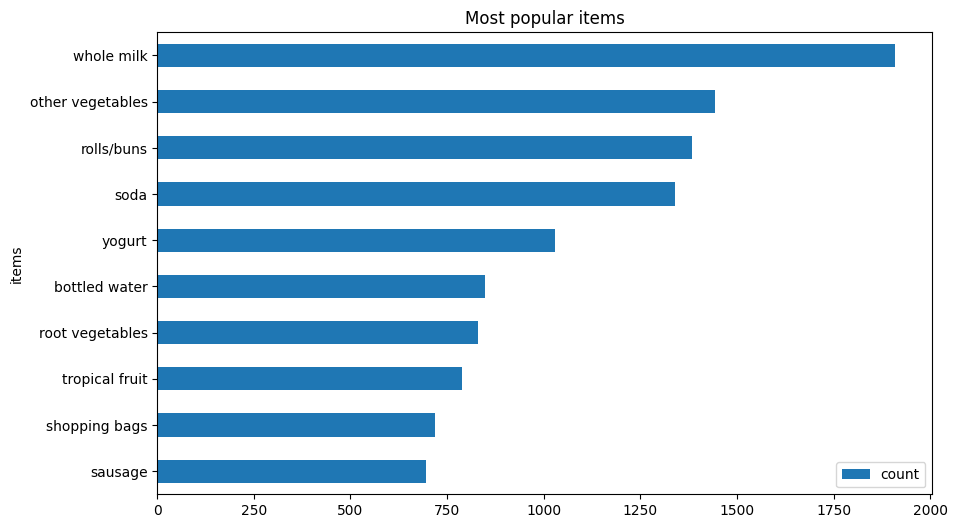

In [15]:
#Data Visualization

plt.rcParams['figure.figsize'] = (10, 6)

ax = pop_item.plot.barh(x = 'items', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

In [19]:
a_rules = apriori(basket_clean, min_support = 0.04, use_colnames =
True)
a_rules.head(5)

,support,itemsets
0,0.050793,(beef)
1,0.080789,(bottled beer)
2,0.113185,(bottled water)
3,0.064525,(brown bread)
4,0.055193,(butter)


In [20]:
rules = association_rules(a_rules, metric = 'lift', min_threshold =1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(rolls/buns),0.192241,0.184509,0.042128,0.219140,1.187695,0.006658,1.044350,0.195644
1,(rolls/buns),(other vegetables),0.184509,0.192241,0.042128,0.228324,1.187695,0.006658,1.046759,0.193789
2,(other vegetables),(root vegetables),0.192241,0.110519,0.048660,0.253121,2.290299,0.027414,1.190931,0.697455
3,(root vegetables),(other vegetables),0.110519,0.192241,0.048660,0.440290,2.290299,0.027414,1.443173,0.633376
4,(other vegetables),(whole milk),0.192241,0.254633,0.073590,0.382802,1.503348,0.024639,1.207662,0.414503


Get count customers when they are lower than a specific amount

In [31]:
df = pd.read_excel("content/LongTailDB.xlsx", header = 0)
df.head(3)

,CustomerCount(Purchased-1),CustomerCount(not Purchased-0),Product Name,2021-10-01 00:00:00,2021-10-02 00:00:00,2021-10-03 00:00:00,2021-10-04 00:00:00,2021-10-05 00:00:00,2021-10-06 00:00:00,2021-10-07 00:00:00,...,2021-10-22 00:00:00,2021-10-23 00:00:00,2021-10-24 00:00:00,2021-10-25 00:00:00,2021-10-26 00:00:00,2021-10-27 00:00:00,2021-10-28 00:00:00,2021-10-29 00:00:00,2021-10-30 00:00:00,2021-10-31 00:00:00
0,74,26,citrus fruit,0,0,1,0,1,1,1,...,1,1,0,1,0,0,1,0,0,1
1,26,74,tropical fruit,0,1,0,0,1,1,1,...,1,1,0,0,1,0,1,0,1,0
2,38,62,whole milk,0,1,0,0,1,1,1,...,0,0,0,0,0,0,1,1,0,1


In [33]:
filtered_df = df[df['CustomerCount(Purchased-1)'] < 20]
filtered_df

,CustomerCount(Purchased-1),CustomerCount(not Purchased-0),Product Name,2021-10-01 00:00:00,2021-10-02 00:00:00,2021-10-03 00:00:00,2021-10-04 00:00:00,2021-10-05 00:00:00,2021-10-06 00:00:00,2021-10-07 00:00:00,...,2021-10-22 00:00:00,2021-10-23 00:00:00,2021-10-24 00:00:00,2021-10-25 00:00:00,2021-10-26 00:00:00,2021-10-27 00:00:00,2021-10-28 00:00:00,2021-10-29 00:00:00,2021-10-30 00:00:00,2021-10-31 00:00:00
3,8,92,pip fruit,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,1,1
10,8,92,tropical fruit,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,1
13,5,95,frankfurter,1,1,0,0,0,1,0,...,0,1,1,0,0,1,1,0,1,1
15,18,82,butter,0,1,1,1,1,0,0,...,0,1,0,0,1,1,0,1,1,1
38,4,96,root vegetables,0,1,1,0,1,0,1,...,1,1,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,19,81,root vegetables,0,1,1,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
2226,3,97,whole milk,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,1,1,1
2229,2,98,pork,1,1,0,0,1,0,0,...,1,1,1,0,0,1,0,1,1,1
2237,13,87,salty snack,0,1,0,1,0,1,1,...,1,0,1,0,1,1,1,1,0,1


# Convolution Neural Network Tutorial

Model of deep learning to handle images, videos - classification analytics 

Replaced by the generative AI now

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 44s 0us/step


c:\Users\E1005290\OneDrive - Sanlam Life Insurance Limited\Documents\Machine Learning and AI\Machine-Learning-Notes\menv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.3508 - loss: 1.7524 - val_accuracy: 0.5530 - val_loss: 1.2438
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5683 - loss: 1.2179 - val_accuracy: 0.6083 - val_loss: 1.0978
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6282 - loss: 1.0472 - val_accuracy: 0.6402 - val_loss: 1.0162
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6694 - loss: 0.9430 - val_accuracy: 0.6532 - val_loss: 1.0052
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6975 - loss: 0.8669 - val_accuracy: 0.6646 - val_loss: 0.9692
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7137 - loss: 0.8111 - val_accuracy: 0.6787 - val_loss: 0.9238
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7368 - loss: 0.7533 - val_accuracy: 0.6932 - val_loss: 0.8825
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7547 -

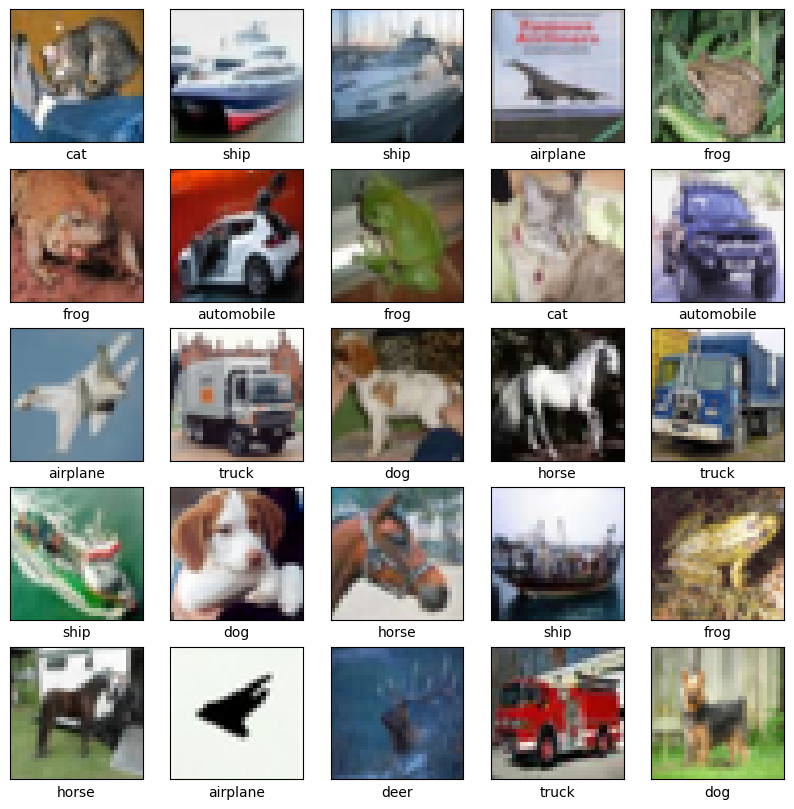

In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot sample images with predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()


In [3]:
# %pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
